In [129]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Import Titanic train and test sets and perform some basic exploratory data analysis.

# Exploratory Data Analysis

In [33]:
train = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/titanic_train.csv')
test = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/titanic_test.csv')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Is there any null values for any column?

In [36]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Create a heatmap depicting null values

<AxesSubplot:>

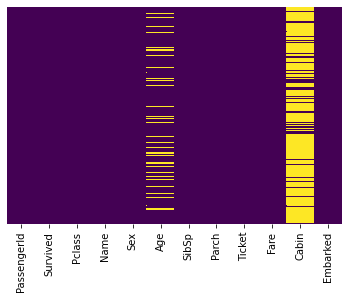

In [42]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

How is the survived column distributed per sex?

<AxesSubplot:xlabel='Survived', ylabel='count'>

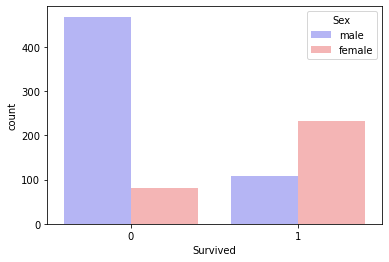

In [38]:
sns.countplot(data=train, x='Survived', hue='Sex', palette='bwr')

The people who didn't survive are overwhelmingly male, while those survived happen to be female in majority.

Compare how people from different passanger classes survived or did not.

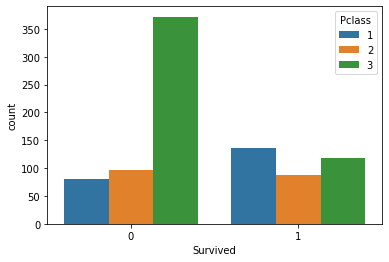

In [49]:
sns.countplot(data=train, x='Survived', hue='Pclass');

Most people were apparently in class 3 which was the cheapiest class.

How is the age of people in Titanic distributed?

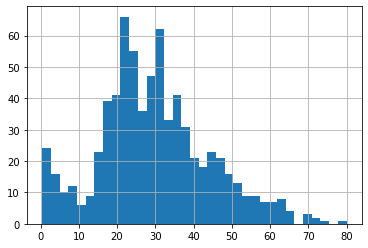

In [54]:
train.Age.hist(bins=35);

Look at how many passenger has a sibling or spouse (SibSp column) in the ship.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

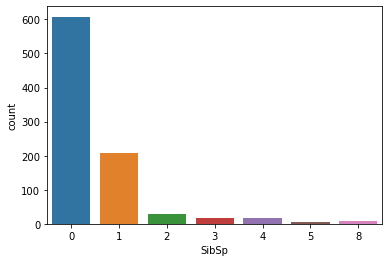

In [55]:
sns.countplot(data=train, x='SibSp')

How much people paid for Titanic?

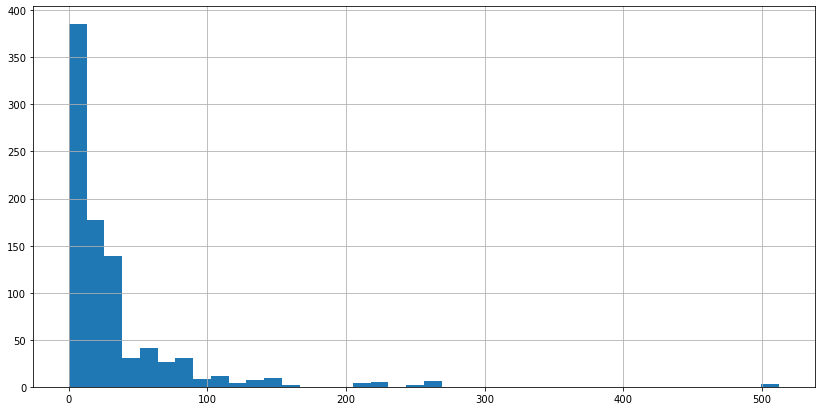

In [58]:
train.Fare.hist(bins=40, figsize=(14,7));

Considering that the most people were in the cheapest class, it makes sense that the fare distribution is skewed towards lower prices.

Alternatively, we can create an interactive plot with cufflink.

In [64]:
import cufflinks as cf

In [65]:
cf.go_offline()

In [66]:
train['Fare'].iplot(kind='hist', bins=30)

We have observed that there are many missing column in Age column. Now fill those values with the average age per Pclass.

In [79]:
class_age = train.groupby(['Pclass']).Age.transform(np.mean)
class_age

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

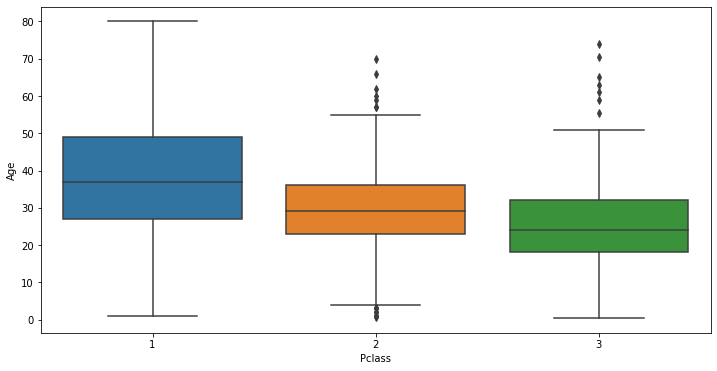

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train, x='Pclass', y='Age')

In [82]:
train.Age.fillna(class_age, inplace=True)
train.Age

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [83]:
train.Age.isnull().any()

False

<AxesSubplot:>

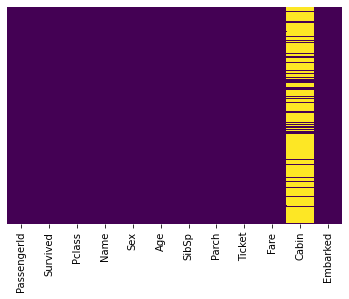

In [90]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

 All the null values in age column are replaced with the average age of the class in that row.

Since we have too many null values in Cabin column, we better drop that column entirely.

In [91]:
train.drop(columns=['Cabin'], inplace=True)

Convert the columns contatining categorical entries to dummy variables.

In [112]:
def dummy(row):
    if row == 'male' or row == 'S': # convert male and S to 0
        return 0
    elif row == 'female' or row == 'C': # convert male and S to 0
        return 1
    elif row == 'Q':
        return 2

In [115]:
train['Sex_dummy'] =  train.Sex.apply(lambda x: dummy(x))
train['Embarked_dummy'] = train.Embarked.apply(lambda x: dummy(x))

In [117]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_dummy,Embarked_dummy
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,1,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,1,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,0,1.0


Alternatively, we can apply pd.get_dummies attribute to the Sex and Embarked columns.

In [119]:
pd.get_dummies(train.Sex, drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [121]:
sex = pd.get_dummies(train.Sex, drop_first=True)
embarked = pd.get_dummies(train.Embarked, drop_first=True)
sex, embarked

(     male
 0       1
 1       0
 2       0
 3       0
 4       1
 ..    ...
 886     1
 887     0
 888     0
 889     1
 890     1
 
 [891 rows x 1 columns],
      Q  S
 0    0  1
 1    0  0
 2    0  1
 3    0  1
 4    0  1
 ..  .. ..
 886  0  1
 887  0  1
 888  0  1
 889  0  0
 890  1  0
 
 [891 rows x 2 columns])

In [124]:
train = pd.concat((train, sex, embarked), axis=1)

In [125]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_dummy', 'Embarked_dummy',
       'male', 'Q', 'S'],
      dtype='object')

# Logistic Regression

In [136]:
X, y = train[['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'male', 'Q', 'S']], train['Survived']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
model = LogisticRegression(max_iter=400)

In [143]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [144]:
predictions = model.predict(X_test)

Get the confusion matrix, the accuracy, recall and other metrics of our model.

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
confusion_matrix(y_test, predictions)

array([[97, 10],
       [19, 53]], dtype=int64)

In [160]:
53/63

0.8412698412698413

In [150]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.84      0.74      0.79        72

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



We can also see that 97 / (97 + 19) = 0.836 (precision for 0), and 53 / (53 + 10) = 0.841 (precision for 1)

# Predict Ad Click with Logistic Regression

Build a model that predicts if a person will click on an ad based on the attributes given the following dataset.

In [255]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/datasets/advertising.csv', parse_dates=['Timestamp'])
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
342,88.12,38,46653.75,230.91,Realigned next generation projection,Hurleyborough,0,Gibraltar,2016-02-17 07:05:57,0
836,49.21,46,49206.40,115.60,Realigned 24/7 core,Carterland,0,Mexico,2016-02-28 03:34:35,1
585,78.60,46,41768.13,254.59,Enhanced systematic adapter,Lake Elizabethside,1,Micronesia,2016-07-20 13:21:37,0
636,59.36,49,46931.03,110.84,Universal multi-state system engine,Amandafort,0,Belarus,2016-07-01 01:12:04,1
797,77.05,34,65756.36,236.08,Centralized value-added hierarchy,Villanuevastad,0,Namibia,2016-05-17 18:06:46,0


We cannot draw out too much information from Timestamp, but extracting only the hours could benefit the logistic regression model. Let's create a new column that only shows the hours.

In [256]:
df['Hour'] =  df.Timestamp.dt.strftime('%H').astype(int)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(3)
memory usage: 82.2+

Let's see there are how many different ad topic lines, countries and cities 

In [258]:
len(df['Ad Topic Line'].unique()), len(df['City'].unique()), len(df['Country'].unique())

(1000, 969, 237)

Since almost all ad topic lines, cities and countries are different than each other, it would be better if we drop those three columns as it would be very hard to convert them into dummy variables.

In [259]:
df.drop(['Ad Topic Line', 'City', 'Country'], axis=1, inplace=True)

Check for the null values.

In [260]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
Hour                        0
dtype: int64

As we now only left with columns with numbers and a timestamp, it would be nice to see some basic stats about the columns

In [261]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,11.660000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,6.960952
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,6.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,12.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,18.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,23.000000


The mean of Clicked on Ad and Male are 0.5 ad 0.48, respectively, meaning the dataset is perfectly balanced in terms of labels and sex. 

How is the age distributed in the dataset?

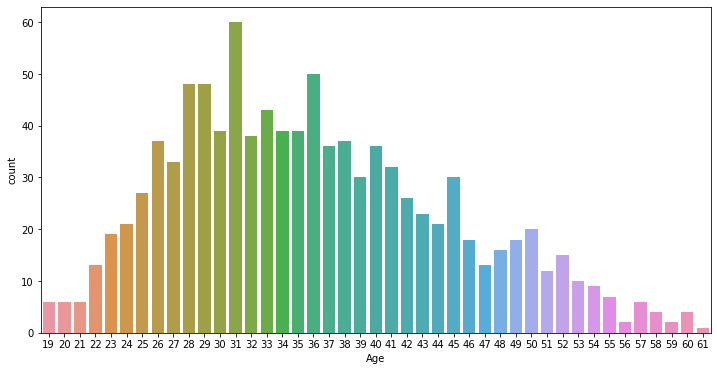

In [262]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Age');

Is there a relation between Area Income and Daily Internet Usage?

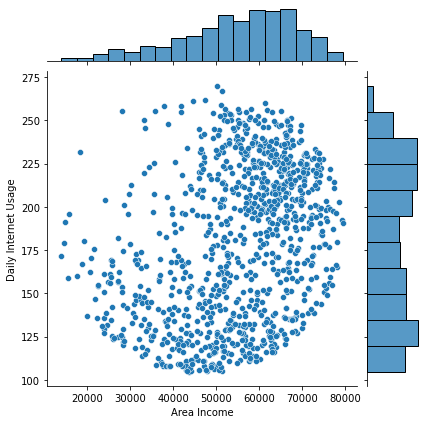

In [263]:
sns.jointplot(data=df, x='Area Income', y='Daily Internet Usage')

There is no strong correlation between the two attributes but Daily Internet Usage starts to spread in a more wide range after Area Income hits 30K's. 

Show the kde distribution of Age vs Daily Time Spent on Site.

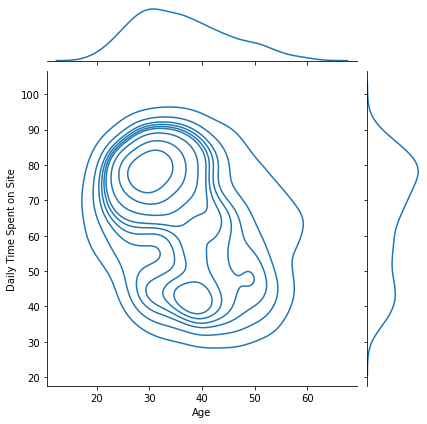

In [297]:
sns.jointplot(data=df, x='Age', y='Daily Time Spent on Site', kind='kde')

Take a look at the correlation between Age and Daily Time Spent on Site. .

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

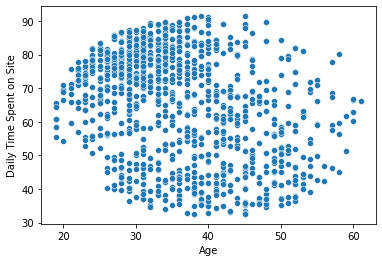

In [264]:
sns.scatterplot(data=df, x='Age', y='Daily Time Spent on Site')

We can safely say that there is no direct correlation between Age and Daily Time Spent on Site. Now plot the pairplots and heatmap depicting the correlations between each pairs.

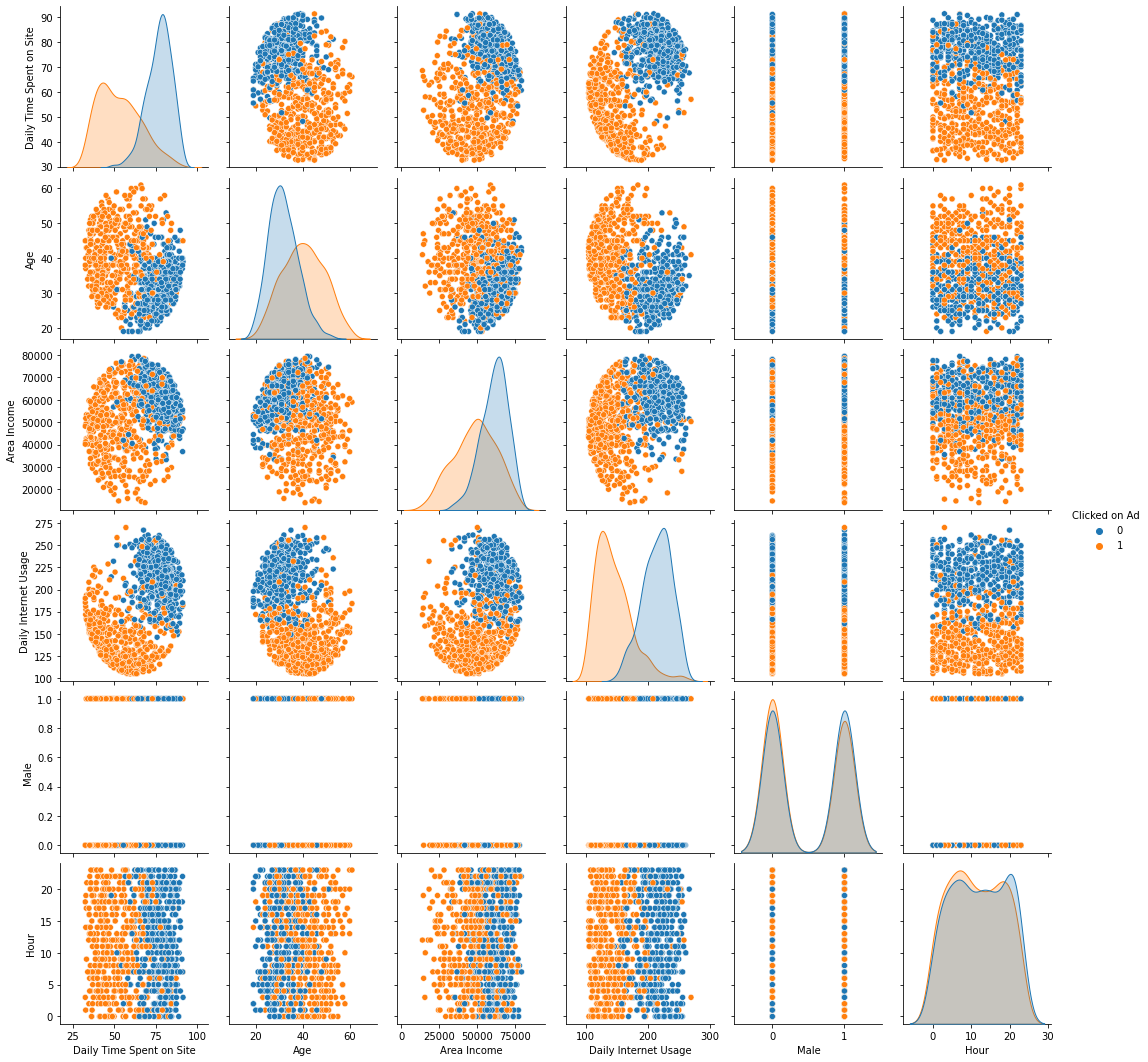

In [298]:
sns.pairplot(df, hue='Clicked on Ad')

<AxesSubplot:>

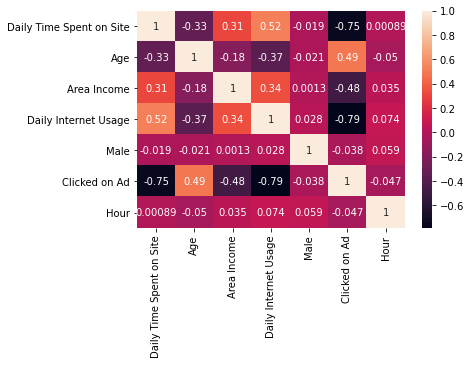

In [265]:
sns.heatmap(df.corr(), annot=True)

We see that most attributes have little or negative correlation. The most strong negative correlation is between Daily Internet Usage and Clicked on Ad.

In [266]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'Hour'],
      dtype='object')

In [324]:
X, y = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Hour']], df['Clicked on Ad']

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [326]:
model = LogisticRegression(max_iter=100)

In [327]:
model.fit(X_train, y_train)

LogisticRegression()

In [328]:
predictions = model.predict(X_test)

Get the confusion matrix and basic metrics for the model.

In [329]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       103
           1       0.94      0.90      0.92        97

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [330]:
confusion_matrix(y_test, predictions)

array([[97,  6],
       [10, 87]], dtype=int64)